In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
sys.path.append('../utils/')
from helper_function import map_unique_values


In [3]:
dataset = pd.read_csv("../../data/Cardetails.csv")
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
dataset.shape

(8128, 13)

In [6]:
total_null = dataset.isnull().sum() 
total_null/ dataset.shape[0] * 100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

Here we can see the percentage of null values in terms of precentage and the null vlaues are really less so we can just delete the null values row 

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.duplicated().sum()


np.int64(1189)

In [9]:
# Checking the dublicates
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.shape

(6717, 13)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


## Data Analysis

In [12]:
for cols in dataset.columns:
    print(f'Unique values of: {cols}')
    print(f'{dataset[cols].unique()}')

Unique values of: name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of: year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of: selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   31500

### Preprocessing the the Name section

In [13]:
def get_car_brand(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [14]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0

    return float(value)

In [15]:
get_car_brand("Audi volvo 2020")

'Audi'

#### Cleaning the Name section

In [16]:
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:
# Here we are just taking the first name and getting the unique names as the conpany name can be repeated
dataset['name'] = dataset['name'].apply(get_car_brand)
dataset['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

# Cleaning the Milage Section

In [18]:
dataset['mileage'] = dataset['mileage'].apply(clean_data)

### Cleaning the Max power

In [19]:
dataset['max_power'] = dataset['max_power'].apply(clean_data)

### Cleaning the engine Section

In [20]:
dataset['engine'] = dataset['engine'].apply(clean_data)

In [21]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


### Assining numeric values to the name, fuel, selling_type, transmision, owner

In [22]:
name_mapping = {name: idx + 1 for idx, name in enumerate(dataset['name'].unique())}
dataset['name'] = dataset['name'].map(name_mapping)

In [23]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,2,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,3,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,4,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,1,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,2,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,3,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,4,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,1,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
map_unique_values(dataset,'fuel')

In [26]:
map_unique_values(dataset,'seller_type')

In [27]:
map_unique_values(dataset,'transmission')

In [28]:
map_unique_values(dataset,'owner')

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(4), int64(8), object(1)
memory usage: 734.7+ KB


In [4]:
import os

# Folder path
folder_path = './data'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")

In [5]:
dataset.to_csv('./data/cars_revised_data.csv')

## Model Creation

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
revised_dataset = pd.read_csv('../data/cars_revised_data.csv')

In [8]:
# As we do not need the torque colum we drop it here
data = revised_dataset.drop(columns=['Unnamed: 0','torque'])
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6712,1,2013,260000,50000,1,0,0,1,18.90,998.0,67.10,5.0
6713,4,2014,475000,80000,0,0,0,1,22.54,1396.0,88.73,5.0
6714,4,2013,320000,110000,1,0,0,0,18.50,1197.0,82.85,5.0
6715,4,2007,135000,119000,0,0,0,3,16.80,1493.0,110.00,5.0


In [10]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']

In [11]:
# Standarizing the value before split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# y_scaler = MinMaxScaler()
# y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [12]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,random_state=42,test_size=0.2)

In [38]:
X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tesnsor = torch.tensor(y_train.values,dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1,1)

In [39]:
# Creating a training and testing using batching 

train_dataset  = TensorDataset(X_train_tensor,y_train_tesnsor)
test_dataset = TensorDataset(X_test_tensor,y_test_tensor)

train_loader  = DataLoader(train_dataset,batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [40]:
class PricePredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(PricePredictionModel, self).__init__()
        
        # Define each layer individually
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(32, 16)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(16, 8)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.relu5(self.fc5(x))
        x = self.fc6(x)
        return x


In [41]:
# Initializing the Model
input_dim = X_train.shape[1]
model = PricePredictionModel(input_dim)

In [42]:
# Defining the Loss function 
criterion = nn.HuberLoss()
optimizer  = optim.Adam(model.parameters(),lr=0.001)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming train_loader, model, optimizer, criterion are already defined

epochs = 200
model.train()
train_loss = []
train_accuracy = []
epoch_numbers = []  # To store the epoch numbers

for epoch in range(epochs):
    epoch_loss = 0
    correct_train = 0
    total_train = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
        # Calculate accuracy for training
        correct_train += ((predictions - y_batch).abs() < 0.1 * y_batch).sum().item()
        total_train += y_batch.size(0)

    # Calculate average loss for this epoch
    average_epoch_loss = epoch_loss / len(train_loader)
    train_loss.append(average_epoch_loss)

    # Store the epoch number
    epoch_numbers.append(epoch + 1)

    # Calculate training accuracy for this epoch
    train_accuracy_epoch = correct_train / total_train * 100
    train_accuracy.append(train_accuracy_epoch)

    # Print loss and accuracy every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {average_epoch_loss:.4f}, Train Accuracy: {train_accuracy_epoch:.2f}%")


Epoch [10/200], Loss: 119195.7001, Train Accuracy: 32.18%
Epoch [20/200], Loss: 113802.1252, Train Accuracy: 33.48%
Epoch [30/200], Loss: 109855.9732, Train Accuracy: 34.39%
Epoch [40/200], Loss: 106649.6886, Train Accuracy: 35.36%
Epoch [50/200], Loss: 103750.6047, Train Accuracy: 36.14%
Epoch [60/200], Loss: 101251.8920, Train Accuracy: 36.61%
Epoch [70/200], Loss: 98638.1161, Train Accuracy: 38.34%
Epoch [80/200], Loss: 95898.5679, Train Accuracy: 38.94%
Epoch [90/200], Loss: 93579.8823, Train Accuracy: 39.96%
Epoch [100/200], Loss: 91219.7524, Train Accuracy: 40.82%
Epoch [110/200], Loss: 89379.9965, Train Accuracy: 41.49%
Epoch [120/200], Loss: 87887.9991, Train Accuracy: 42.02%
Epoch [130/200], Loss: 87140.4985, Train Accuracy: 42.23%
Epoch [140/200], Loss: 85340.3796, Train Accuracy: 42.45%
Epoch [150/200], Loss: 83993.0754, Train Accuracy: 43.76%
Epoch [160/200], Loss: 82970.6981, Train Accuracy: 44.56%
Epoch [170/200], Loss: 81990.1721, Train Accuracy: 44.52%
Epoch [180/200], 

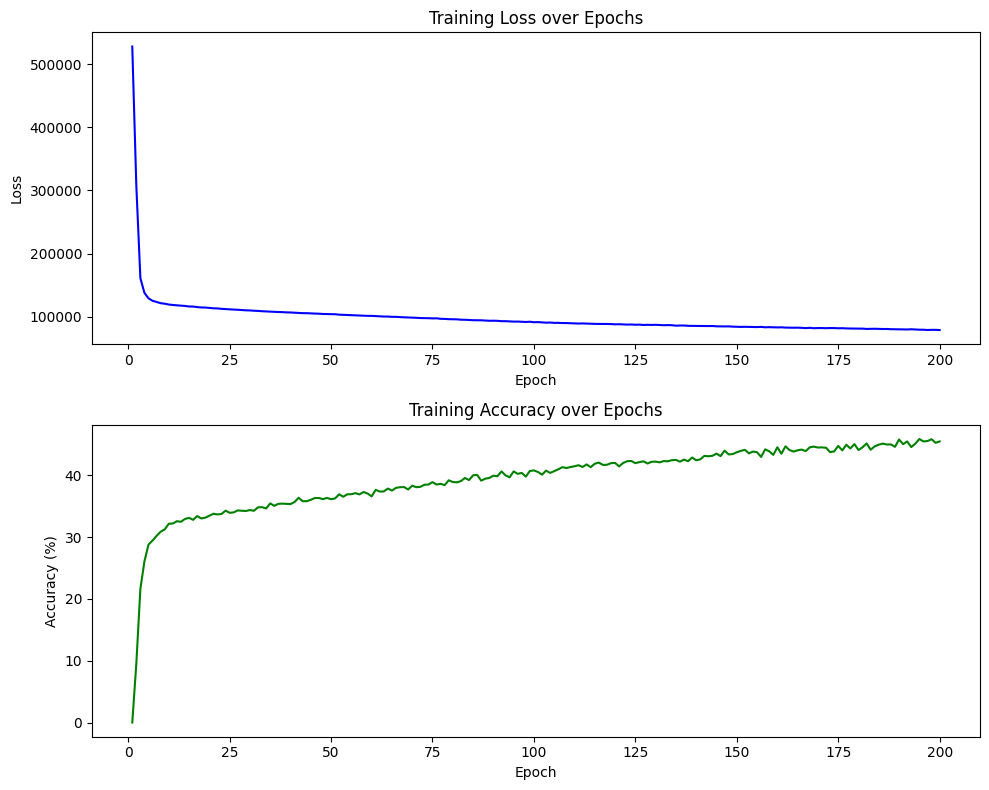

In [44]:
# Create subplots to display both loss and accuracy
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot Training Loss
ax[0].plot(epoch_numbers, train_loss, color='blue')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss over Epochs')

# Plot Training Accuracy
ax[1].plot(epoch_numbers, train_accuracy, color='green')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Training Accuracy over Epochs')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [45]:
# Evaluate the model
model.eval()
total_loss = 0
correct_test = 0
total_test = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        total_loss += loss.item()
        
        # Calculate accuracy for testing
        correct_test += ((predictions - y_batch).abs() < 0.1 * y_batch).sum().item()
        total_test += y_batch.size(0)

test_accuracy = correct_test / total_test * 100
print(f"Test Loss: {total_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 3653871.7383, Test Accuracy: 38.76%


# Model 2

Epoch [10/200], Loss: 0.1156, MAE: 0.0032
Epoch [20/200], Loss: 0.0939, MAE: 0.0028
Epoch [30/200], Loss: 0.0762, MAE: 0.0026
Epoch [40/200], Loss: 0.0738, MAE: 0.0026
Epoch [50/200], Loss: 0.0669, MAE: 0.0025
Epoch [60/200], Loss: 0.0602, MAE: 0.0024
Epoch [70/200], Loss: 0.0580, MAE: 0.0023
Epoch [80/200], Loss: 0.0528, MAE: 0.0023
Epoch [90/200], Loss: 0.0508, MAE: 0.0022
Epoch [100/200], Loss: 0.0488, MAE: 0.0022
Epoch [110/200], Loss: 0.0474, MAE: 0.0022
Epoch [120/200], Loss: 0.0534, MAE: 0.0023
Epoch [130/200], Loss: 0.0480, MAE: 0.0022
Epoch [140/200], Loss: 0.0429, MAE: 0.0021
Epoch [150/200], Loss: 0.0463, MAE: 0.0022
Epoch [160/200], Loss: 0.0416, MAE: 0.0021
Epoch [170/200], Loss: 0.0377, MAE: 0.0020
Epoch [180/200], Loss: 0.0384, MAE: 0.0020
Epoch [190/200], Loss: 0.0420, MAE: 0.0022
Epoch [200/200], Loss: 0.0365, MAE: 0.0020


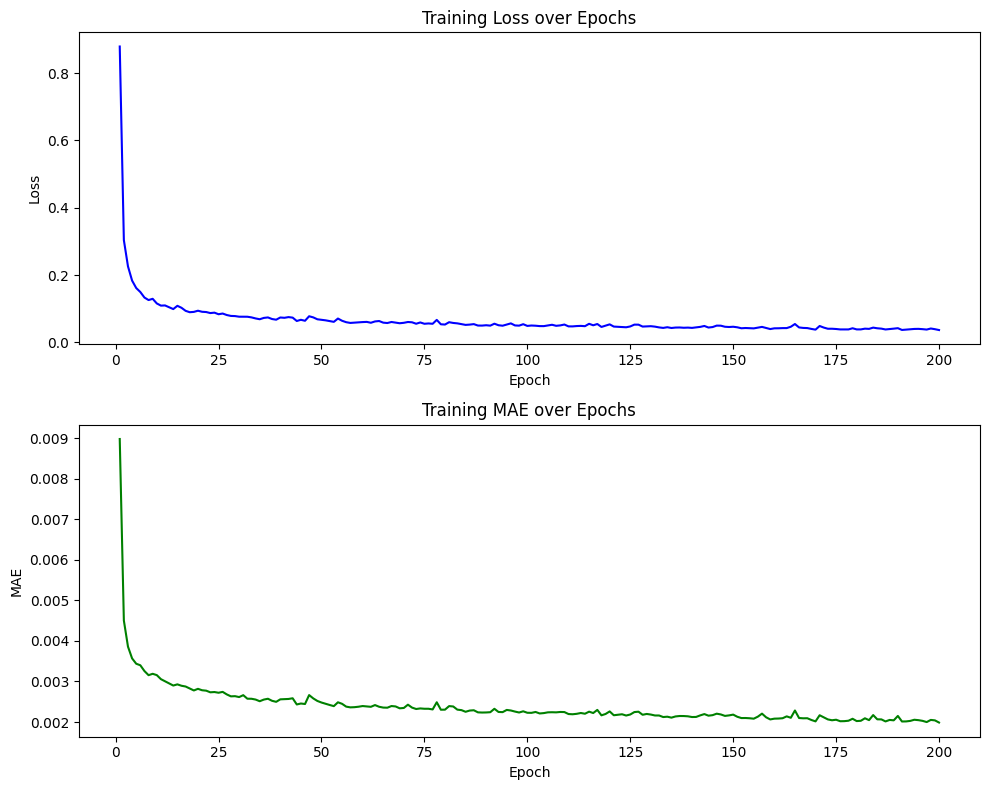

Test MAE: 0.1788, Test MSE: 0.1100, Test R²: 0.8626
Model saved successfully!


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `data` is already loaded and cleaned

# Prepare data
X = data.drop(columns=['selling_price'])
y = data['selling_price']

# Normalize features
scaler = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=42, test_size=0.2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model definition
class PricePredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(PricePredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = PricePredictionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 200
model.train()
train_loss = []
train_mae = []  # Mean Absolute Error for evaluation
epoch_numbers = []

for epoch in range(epochs):
    epoch_loss = 0
    total_train = 0
    correct_train = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
        # Calculate MAE for training
        correct_train += mean_absolute_error(y_batch.detach().numpy(), predictions.detach().numpy())
        total_train += y_batch.size(0)

    # Average loss for the epoch
    average_epoch_loss = epoch_loss / len(train_loader)
    train_loss.append(average_epoch_loss)

    # Training MAE for this epoch
    train_mae_epoch = correct_train / total_train
    train_mae.append(train_mae_epoch)

    epoch_numbers.append(epoch + 1)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {average_epoch_loss:.4f}, MAE: {train_mae_epoch:.4f}")

# Plotting Training Loss and MAE
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot Training Loss
ax[0].plot(epoch_numbers, train_loss, color='blue')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss over Epochs')

# Plot Training MAE
ax[1].plot(epoch_numbers, train_mae, color='green')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('MAE')
ax[1].set_title('Training MAE over Epochs')

plt.tight_layout()
plt.show()

# Evaluate the model on test data
model.eval()
y_test_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        y_test_pred.append(predictions)

y_test_pred = torch.cat(y_test_pred, dim=0).numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae:.4f}, Test MSE: {mse:.4f}, Test R²: {r2:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'price_prediction_model.pth')
print("Model saved successfully!")



Actual		Predicted		Difference
450000.00		1390576.38		-940576.38
800000.00		847958.62		-47958.62
75000.00		221869.22		-146869.22
3200000.00		3426386.75		-226386.75
1650000.00		1456723.38		193276.62
180000.00		138076.78		41923.22
1019999.00		941513.38		78485.62
350000.00		353964.44		-3964.44
722000.00		598434.81		123565.19
315000.00		284198.47		30801.53


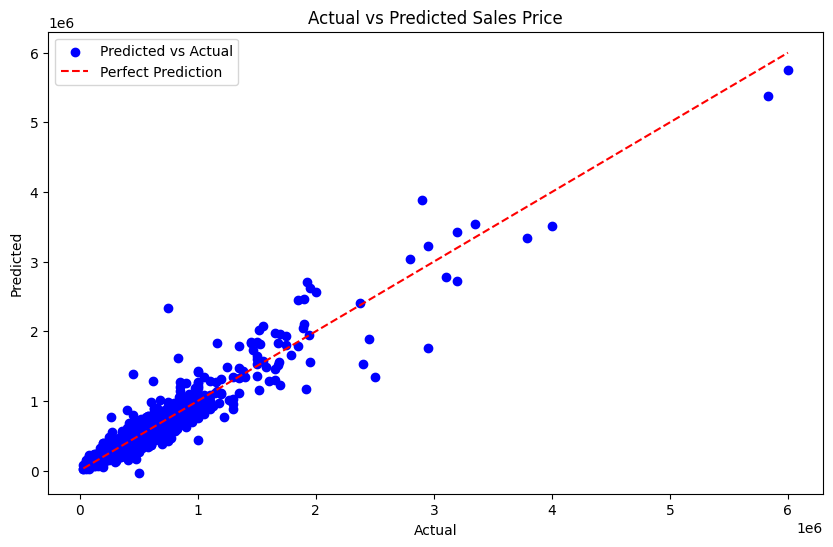

In [29]:
# Evaluate the model on test data
model.eval()
y_test_pred = []
y_test_actual = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        y_test_pred.append(predictions)
        y_test_actual.append(y_batch)

# Concatenate predictions and actual values
y_test_pred = torch.cat(y_test_pred, dim=0).numpy()
y_test_actual = torch.cat(y_test_actual, dim=0).numpy()

# Inverse scaling to get the actual selling prices
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_test_actual = scaler_y.inverse_transform(y_test_actual)

# Calculate the difference between actual and predicted
diff = y_test_actual - y_test_pred

# Display the results (Actual, Predicted, and Difference)
print("Actual\t\tPredicted\t\tDifference")
for actual, predicted, difference in zip(y_test_actual[:10], y_test_pred[:10], diff[:10]):
    print(f"{actual[0]:.2f}\t\t{predicted[0]:.2f}\t\t{difference[0]:.2f}")

# Optionally, plot a comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales Price')
plt.legend()
plt.show()

In [39]:
import numpy as np
import torch

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Get predictions for the test set
y_test_pred = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        y_test_pred.append(predictions)

# Convert y_test_pred to a single tensor and then to a numpy array
y_test_pred = torch.cat(y_test_pred, dim=0).numpy()

# Calculate MAPE
mape = calculate_mape(y_test, y_test_pred)

print(f"Test MAPE: {mape:.4f}%")


Test MAPE: 134.0741%
